<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [10]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [11]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [12]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [8]:
boston_df['MEDV'].median()

21.2

In [9]:
boston_df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


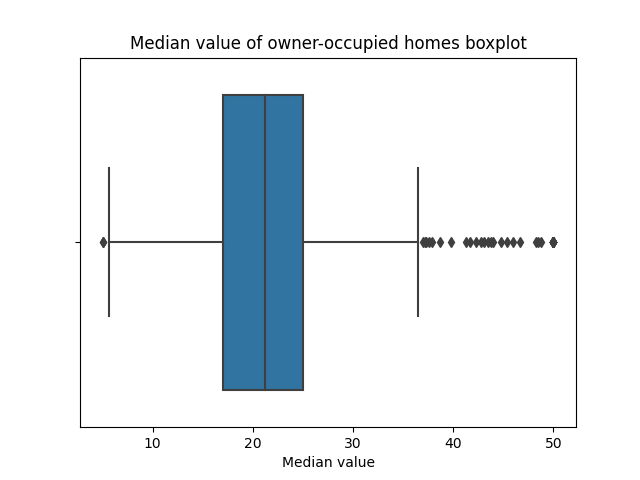

In [49]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x='MEDV', data=boston_df)
plt.xlabel('Median value')

plt.title('Median value of owner-occupied homes boxplot')
plt.show()

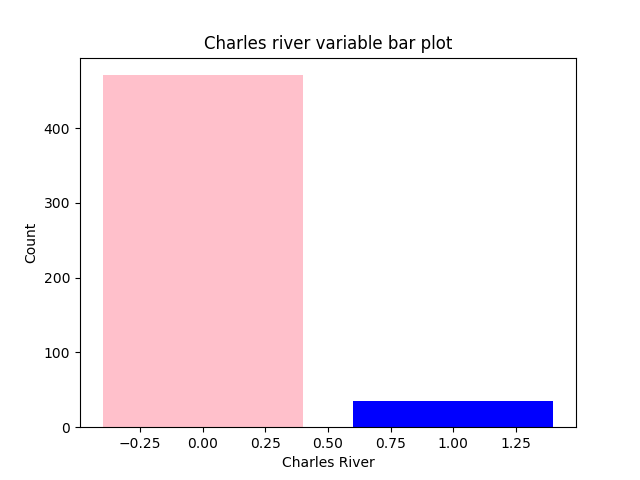

In [11]:
#Provide a  bar plot for the Charles river variable
#sns.set(style="whitegrid")
#ax = sns.barplot(x="CHAS", y="AGE", data=boston_df)
#ax = sns.barplot(x="CHAS", data=boston_df)
plt.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['pink','blue'])
plt.xlabel('Charles River')
plt.ylabel('Count')
plt.title('Charles river variable bar plot')
plt.show()

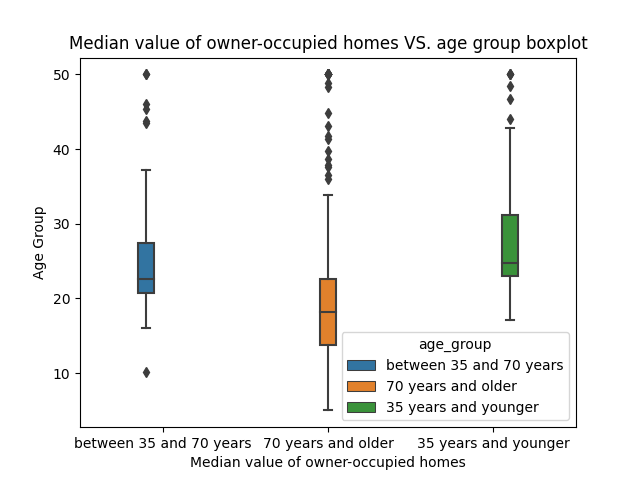

In [47]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(data=boston_df, y='MEDV', x='age_group', hue='age_group', width=0.3)
plt.xlabel('Median value of owner-occupied homes')
plt.ylabel('Age Group')
plt.title('Median value of owner-occupied homes VS. age group boxplot')
plt.show()

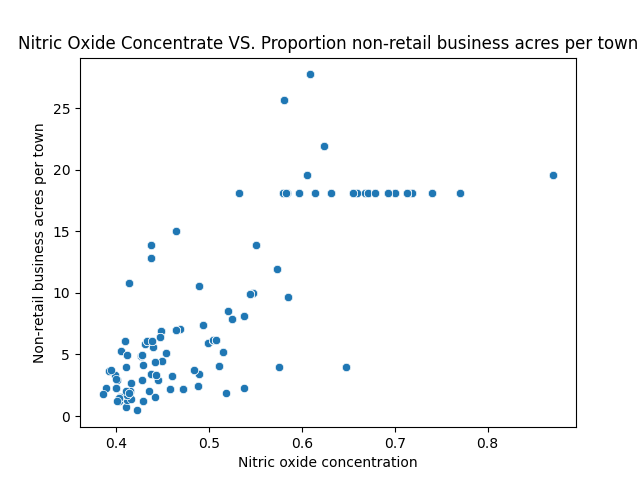

In [13]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.xlabel('Nitric oxide concentration')
plt.ylabel('Non-retail business acres per town')
plt.title('Nitric Oxide Concentrate VS. Proportion non-retail business acres per town')
plt.show()


In [2]:

#Conclution: Nitric oxide concentration is lesser for those with higher proportion of non-retail business acres per town.

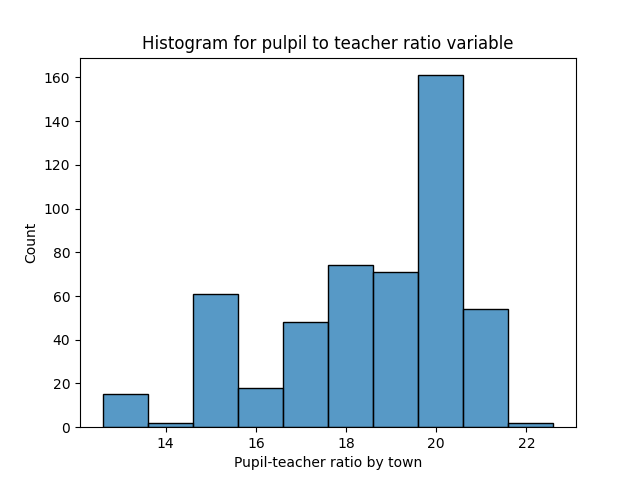

In [14]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(boston_df['PTRATIO'], kde = False, binwidth=1)
plt.xlabel('Pupil-teacher ratio by town')
plt.ylabel('Count')
plt.title('Histogram for pulpil to teacher ratio variable')
plt.show()

In [64]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# H0: there is no significant difference in median value of houses bounded by the Charles river
# H1: there is a significant difference in median value of houses bounded by the Charles river
ax = sns.distplot(boston_df['CHAS'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

<ipython-input-64-e91edf7ae9ef>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['CHAS'],


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [65]:
# Conclusion: Pvalue =7.390623170519905e-05 is less than 0.05, we reject the null hypothesis 
# as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river 

In [72]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# H0: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
# H1: there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [73]:
thirtyFive = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyFive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyFive, thirtyFive_seventy, seventy)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [1]:
# Conclusion: Since the p-value is less than 0.05, 
# we reject the null hypothesis as there is enough prove that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [76]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# H1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
ax = sns.scatterplot(x="NOX", y="PTRATIO", data=boston_df)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['PTRATIO'])


(0.18893267711276765, 1.8856917475764206e-05)

In [77]:
# Conclusion: Since the p-value < 0.05, 
# we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [78]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        13:46:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Conclusion: The p-value is less than the alpha (α) level = 0.05, 
# so we reject the null hypothesis as there is evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes